In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 16
import numpy as np
import warnings
warnings.filterwarnings('ignore')

I got some historical data from here: https://www.investing.com/indices/us-spx-500-historical-data

Have a look - I think weekly resolution is just right for this use case.
I grabbed historical data for the last 30 years (since 1990-01-01).

Let's get to it...

In [2]:
filename = 'S&P 500 Historical Data.csv'
dtypes = {'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'}
raw = pd.read_csv(filename, index_col='Date', dtype=dtypes, thousands=',')
raw = raw.iloc[::-1,]

raw

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Jan 07, 1990",339.93,352.20,354.24,339.49,809.58M,-3.48%
"Jan 14, 1990",339.15,339.93,342.01,333.37,861.31M,-0.23%
"Jan 21, 1990",325.80,339.14,339.96,321.44,905.97M,-3.94%
"Jan 28, 1990",330.92,325.80,332.10,319.83,845.44M,1.57%
"Feb 04, 1990",333.62,330.92,336.09,326.55,774.88M,0.82%
...,...,...,...,...,...,...
"Jun 21, 2020",3009.05,3094.42,3154.90,3004.63,-,-2.86%
"Jun 28, 2020",3130.01,3018.59,3165.81,2999.74,-,4.02%
"Jul 05, 2020",3185.04,3155.29,3186.82,3115.70,-,1.76%


In [3]:
# I'm going to skip plotting the index, but here's how you can do that:

# fig = plt.figure()
# ax = raw.plot(y='Price', ylim=(0, None), grid=True)
# ax.set_ylabel('S&P 500 index')

Now onto the interesting stuff. Let's compute the historic all time high of the index by point in time.

<Figure size 1152x720 with 0 Axes>

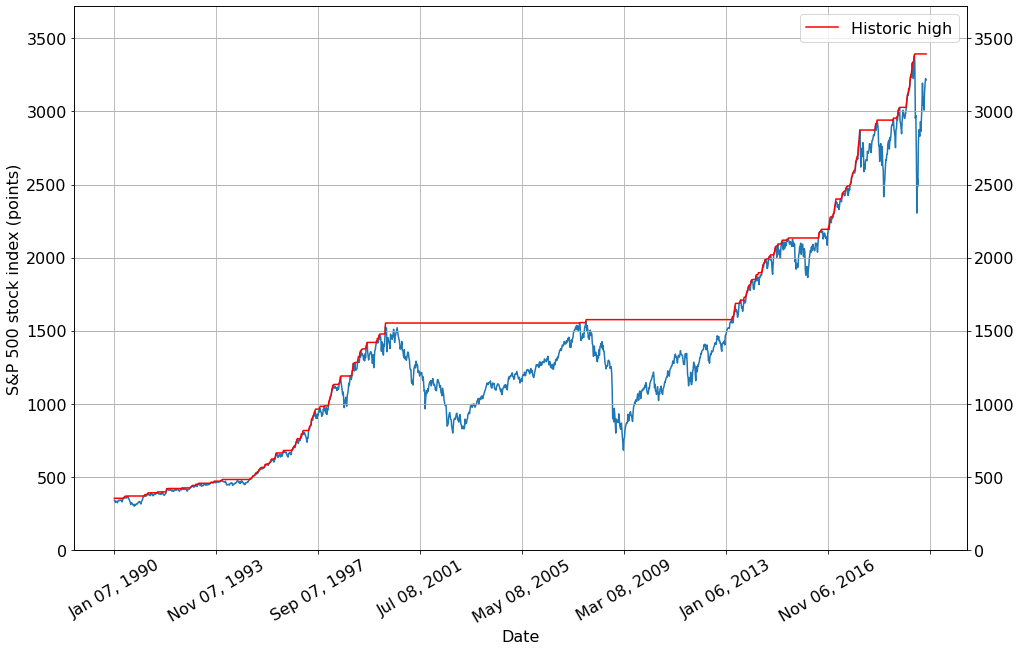

In [4]:
raw['ATH'] = raw['High'].cummax()

plt.figure()
y_max = raw['Price'].max() * 1.1

ax = raw.plot(y='Price', ylim=(0, y_max), grid=True, legend=False)
overlay = ax.twinx()
raw.plot(y='ATH', ylim=(0, y_max), grid=True, ax=overlay, color='r', label='Historic high', mark_right=True)
ax.set_ylabel(f'S&P 500 stock index (points)')  # Annotate your axis, people
ax.tick_params(axis='x', rotation=30)

So, the question is, during how much of our time is the blue line close or equal to the red line?

<Figure size 1152x720 with 0 Axes>

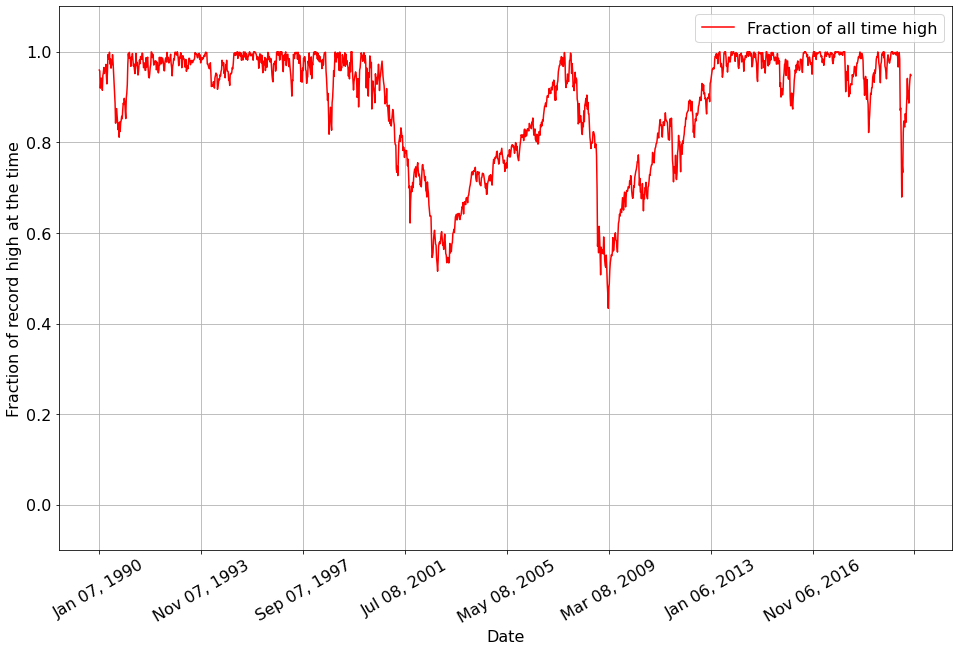

In [5]:
raw['ATH Fraction'] = raw['Price']/raw['ATH']

plt.figure()
ax = raw.plot(y='ATH Fraction', ylim=(-.1, 1.1), grid=True, color='r', label='Fraction of all time high')
ax.set_ylabel('Fraction of record high at the time')
ax.tick_params(axis='x', rotation=30)

So you might say, if you invested in the **worst possible time**, the drop in the Y-axis corresponds to your shocked emotional reaction, and the time until the top is reached again is how long you have to wait to 'get back your investment'.

Let's plot the distribution of the disappointment:

Text(0.5, 0, 'Fraction of record high')

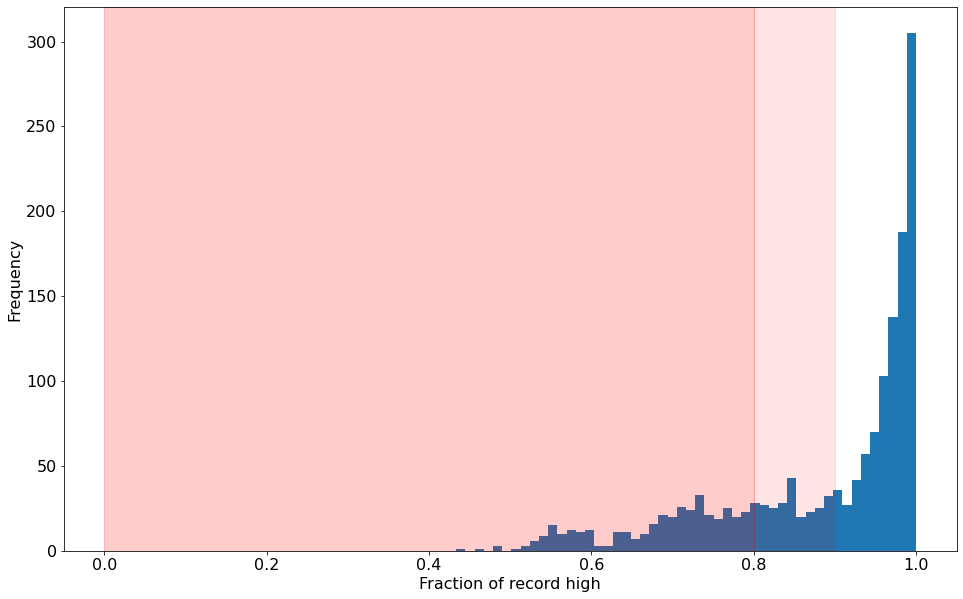

In [6]:
ax = raw['ATH Fraction'].plot.hist(bins=50)
ax.axvspan(.8, .9, color='r', alpha=0.1)
ax.axvspan(0., .8, color='r', alpha=0.2)
ax.set_xlabel('Fraction of record high')

Anything in the light red is a correction, and the dark red is bear market territory.

Now, I'm going to arbitrarily define "close to all-time-high" as 5% below it or higher.
So, for the S&P 500 over the last 30 years, how long has this been the case?

In [7]:
raw['is ATH'] = raw['ATH Fraction'] >= 0.95
raw['is ATH'].astype('int').mean()

0.48243412797992474

Almost half the time. More than you might think, isn't it?

Running the same analysis for a couple more major stock indices:

In [8]:
def analyze(filename, thresh=0.95):
    dtypes = {'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'}
    raw = pd.read_csv(filename, index_col='Date', dtype=dtypes, thousands=',').iloc[::-1,]
    ath = raw['High'].cummax()
    ath_frac = raw['Price']/ath
    time_frac = (ath_frac >= thresh).astype('int').mean()
    print(f"{filename}: {time_frac * 100:.2f}% at ATH")

In [9]:
# All of these are weekly data from 1990-01-01 until 2020-07-20

analyze('S&P 500 Historical Data.csv')
analyze('Dow Jones Industrial Average Historical Data.csv')
analyze('NASDAQ Composite Historical Data.csv')
analyze('DAX Historical Data.csv')
analyze('SMI Historical Data.csv')
analyze('Euro Stoxx 50 Historical Data.csv')
analyze('Nikkei 225 Historical Data.csv')

S&P 500 Historical Data.csv: 48.24% at ATH
Dow Jones Industrial Average Historical Data.csv: 47.99% at ATH
NASDAQ Composite Historical Data.csv: 32.18% at ATH
DAX Historical Data.csv: 23.53% at ATH
SMI Historical Data.csv: 24.28% at ATH
Euro Stoxx 50 Historical Data.csv: 23.02% at ATH
Nikkei 225 Historical Data.csv: 0.38% at ATH
